In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Just a formatting related plugin
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [4]:
import sys

sys.path.append("../")

<IPython.core.display.Javascript object>

In [5]:
from snpe.simulations.marketplace_simulator_class import MarketplaceSimulator
from collections import deque
from pathlib import Path

import numpy as np
import pandas as pd

from numpy.random import default_rng
from scipy.spatial.distance import cdist
from snpe.utils.statistics import review_histogram_means
import pyreadr
from pathlib import Path

<IPython.core.display.Javascript object>

In [6]:
ARTIFACT_PATH = Path("../../../gcs_mount/artifacts/rating_spacing_simulator")
# ARTIFACT_PATH = Path("/data/reputation-systems/snpe/artifacts/rating_spacing_simulator")

<IPython.core.display.Javascript object>

# Use the final class for marketplace simulations

In [7]:
params = {
    "review_prior": np.ones(5),
    "tendency_to_rate": 0.05,
    "simulation_type": "timeseries",
    "previous_rating_measure": "mode of latest",
    "min_reviews_for_herding": 6,
    "num_latest_reviews_for_herding": 5,
    "num_products": 1400,
    # "num_products": 100,
    "num_total_marketplace_reviews": 140_000,
    # "num_total_marketplace_reviews": 5_000,
    "consideration_set_size": 5,
    "one_star_lowest_limit": -1.5,
    "five_star_highest_limit": 1.5,
    "max_bias_5_star": 0.25,
}

<IPython.core.display.Javascript object>

In [8]:
simulator = MarketplaceSimulator(params)

<IPython.core.display.Javascript object>

In [9]:
simulator.simulate(num_simulations=32, embeddings_artifact_path=ARTIFACT_PATH)

Loaded product embedding density estimator: 
 GaussianMixture(max_iter=500, n_components=10, n_init=5, random_state=42,
                verbose=2, verbose_interval=20)
Loaded user embedding density estimator: 
 GaussianMixture(max_iter=500, n_components=10, n_init=5, random_state=42,
                verbose=2, verbose_interval=20)
	 Device set to cpu, using torch num threads=32
Using the dense network: 
 Sequential(
  (0): Linear(in_features=100, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=64, out_features=5, bias=True)
)
Loaded embedding -> rating predictor model: 
 RatingPredictorModel(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_

Worker 1:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 2:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 3:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 4:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 5:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 6:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 7:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 8:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 9:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 10:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 11:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 12:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 13:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 14:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 15:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 16:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 17:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 18:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 19:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 20:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 21:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 22:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 23:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 24:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 25:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 26:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 27:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 28:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 29:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 30:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 31:   0%|          | 0/140000 [00:00<?, ?it/s]

Worker 32:   0%|          | 0/140000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [10]:
len(simulator.simulations)

32

<IPython.core.display.Javascript object>

In [11]:
simulator.save_simulations(ARTIFACT_PATH)

<IPython.core.display.Javascript object>

In [12]:
len(simulator.simulations[0][10])

79

<IPython.core.display.Javascript object>

In [13]:
simulator.simulations[10][99]

array([[  1.,   1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.,   2.],
       [  1.,   1.,   1.,   1.,   3.],
       [  1.,   1.,   1.,   1.,   4.],
       [  1.,   1.,   1.,   1.,   5.],
       [  1.,   1.,   1.,   1.,   6.],
       [  1.,   1.,   1.,   1.,   7.],
       [  1.,   1.,   1.,   1.,   8.],
       [  1.,   1.,   1.,   1.,   9.],
       [  1.,   1.,   1.,   1.,  10.],
       [  1.,   1.,   1.,   2.,  10.],
       [  1.,   1.,   1.,   2.,  11.],
       [  1.,   1.,   1.,   3.,  11.],
       [  1.,   1.,   1.,   3.,  12.],
       [  1.,   1.,   1.,   4.,  12.],
       [  1.,   1.,   1.,   5.,  12.],
       [  1.,   1.,   1.,   6.,  12.],
       [  1.,   1.,   1.,   6.,  13.],
       [  1.,   1.,   1.,   7.,  13.],
       [  1.,   1.,   2.,   7.,  13.],
       [  1.,   1.,   2.,   7.,  14.],
       [  1.,   1.,   2.,   7.,  15.],
       [  1.,   1.,   2.,   8.,  15.],
       [  1.,   1.,   2.,   9.,  15.],
       [  1.,   1.,   2.,   9.,  16.],
       [  1.,   1.,   2.,

<IPython.core.display.Javascript object>

In [14]:
num_reviews = []
for sim in simulator.simulations:
    num_reviews += [len(prods) for prods in sim]
len(num_reviews)

44800

<IPython.core.display.Javascript object>

In [15]:
np.unique(num_reviews, return_counts=True)

(array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181

<IPython.core.display.Javascript object>

(array([1.2931e+04, 1.7729e+04, 7.4210e+03, 4.5680e+03, 1.5590e+03,
        4.4400e+02, 1.0500e+02, 3.1000e+01, 9.0000e+00, 3.0000e+00]),
 array([  4.,  60., 116., 172., 228., 284., 340., 396., 452., 508., 564.]),
 <BarContainer object of 10 artists>)

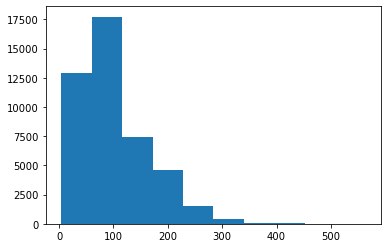

<IPython.core.display.Javascript object>

In [16]:
plt.hist(num_reviews)

In [17]:
ratings = np.zeros(5)
for sim in simulator.simulations:
    for prods in sim:
        ratings += prods[-1]

<IPython.core.display.Javascript object>

In [18]:
ratings

array([ 591960.,  263364.,  614166., 1009830., 2224680.])

<IPython.core.display.Javascript object>

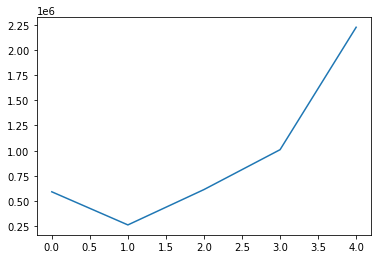

<IPython.core.display.Javascript object>

In [19]:
plt.plot(ratings)

In [20]:
index = []
for sim in simulator.simulations:
    for prods in sim:
        diff = np.sum(prods[-1][3:]) - np.sum(prods[-1][:2])
        index.append(diff)

<IPython.core.display.Javascript object>

(array([1.6730e+03, 1.6471e+04, 1.4116e+04, 6.3770e+03, 3.9770e+03,
        1.5710e+03, 4.6400e+02, 1.0900e+02, 2.8000e+01, 1.4000e+01]),
 array([-43. ,  -5.2,  32.6,  70.4, 108.2, 146. , 183.8, 221.6, 259.4,
        297.2, 335. ]),
 <BarContainer object of 10 artists>)

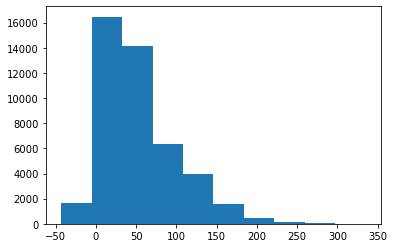

<IPython.core.display.Javascript object>

In [21]:
plt.hist(index)

In [22]:
print(np.mean(np.array(index) >= 0))

0.9390178571428571


<IPython.core.display.Javascript object>

In [21]:
num_reviews = []
for sim in simulator.simulations:
    num_reviews += [len(prods) for prods in sim]
len(num_reviews)

2000

<IPython.core.display.Javascript object>

(array([703., 332., 270., 278., 203., 127.,  50.,  30.,   4.,   3.]),
 array([  6. ,  46.7,  87.4, 128.1, 168.8, 209.5, 250.2, 290.9, 331.6,
        372.3, 413. ]),
 <BarContainer object of 10 artists>)

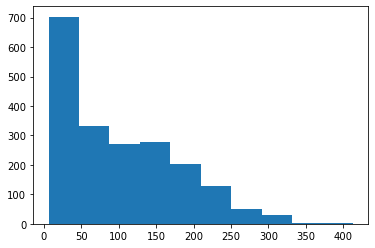

<IPython.core.display.Javascript object>

In [22]:
plt.hist(num_reviews)

In [19]:
type(simulator.simulations)

numpy.ndarray

<IPython.core.display.Javascript object>

# Testing out all the code

In [17]:
params = {
    "review_prior": np.ones(5),
    "tendency_to_rate": 0.05,
    "simulation_type": "timeseries",
    "previous_rating_measure": "mode",
    "min_reviews_for_herding": 5,
    "num_products": 1400,
    "num_total_marketplace_reviews": 140_000,
    "consideration_set_size": 5,
}

<IPython.core.display.Javascript object>

In [18]:
simulator = MarketplaceSimulator(params)

<IPython.core.display.Javascript object>

In [19]:
simulator.load_embedding_density_estimators()
simulator.load_embedding_rating_predictor()

Loaded product embedding density estimator: 
 GaussianMixture(max_iter=500, n_components=10, n_init=5, random_state=42,
                verbose=2, verbose_interval=20)
Loaded user embedding density estimator: 
 GaussianMixture(max_iter=500, n_components=10, n_init=5, random_state=42,
                verbose=2, verbose_interval=20)
	 Device set to cpu, using torch num threads=16
Using the dense network: 
 Sequential(
  (0): Linear(in_features=100, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=64, out_features=5, bias=True)
)
Loaded embedding -> rating predictor model: 
 RatingPredictorModel(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_

<IPython.core.display.Javascript object>

In [9]:
product_embeddings, _ = simulator.embedding_density_estimator.product_model.sample(n_samples=simulator.num_products)

<IPython.core.display.Javascript object>

In [11]:
product_embeddings.shape

(1400, 100)

<IPython.core.display.Javascript object>

In [12]:
pred_product_ratings = simulator.predict_ratings_from_embeddings(product_embeddings.copy())

<IPython.core.display.Javascript object>

In [15]:
print(pred_product_ratings.shape)
pred_product_ratings

(1400, 5)


array([[ 3.992155 ,  2.2148726,  3.6162026, 11.657198 , 24.450998 ],
       [ 3.3254642,  2.0040736,  2.995513 ,  8.312327 , 16.183367 ],
       [ 3.6264749,  2.1039028,  3.2744224,  9.753601 , 19.620234 ],
       ...,
       [ 3.7359502,  2.1414642,  3.3798559, 10.358535 , 21.143726 ],
       [ 3.9027734,  2.1929007,  3.5380857, 11.236549 , 23.334326 ],
       [ 3.645616 ,  2.1119294,  3.2960632,  9.896704 , 20.019041 ]],
      dtype=float32)

<IPython.core.display.Javascript object>

(array([  5.,  26., 118., 295., 466., 280., 126.,  53.,  23.,   8.]),
 array([2.5516927, 2.8050284, 3.0583644, 3.3117   , 3.5650358, 3.8183718,
        4.0717072, 4.325043 , 4.578379 , 4.8317146, 5.0850506],
       dtype=float32),
 <BarContainer object of 10 artists>)

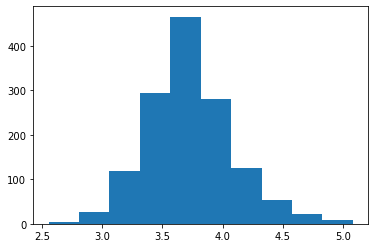

<IPython.core.display.Javascript object>

In [16]:
plt.hist(pred_product_ratings[:, 0])

(array([ 10.,  79., 276., 472., 320., 131.,  70.,  26.,  10.,   6.]),
 array([20.507717, 25.78635 , 31.064983, 36.343616, 41.62225 , 46.900887,
        52.17952 , 57.458153, 62.736786, 68.01542 , 73.29405 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

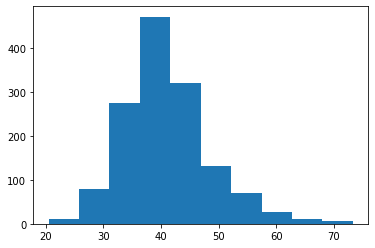

<IPython.core.display.Javascript object>

In [17]:
plt.hist(np.sum(pred_product_ratings, axis=1))

In [19]:
simulated_reviews = [
    deque([np.ones(5)], maxlen=140_000 * 30) for prod in range(simulator.num_products)
]

<IPython.core.display.Javascript object>

In [169]:
a = simulator.embedding_density_estimator.user_model.means_

<IPython.core.display.Javascript object>

In [35]:
simulator.embedding_density_estimator.user_model.set_params(**{"random_state": None})

GaussianMixture(max_iter=500, n_components=10, n_init=5, verbose=2,
                verbose_interval=20)

<IPython.core.display.Javascript object>

In [171]:
b = simulator.embedding_density_estimator.user_model.means_

<IPython.core.display.Javascript object>

In [175]:
np.testing.assert_array_equal(a, b)

<IPython.core.display.Javascript object>

In [46]:
visitor_embedding, _ = simulator.embedding_density_estimator.user_model.sample()

<IPython.core.display.Javascript object>

In [47]:
visitor_embedding

array([[-9.94471905e-03,  1.56075438e-02,  7.79502569e-03,
        -1.12857744e-02,  2.52078174e-03,  2.15934560e-02,
        -3.15823833e-03,  2.18566768e-02, -1.40509780e-02,
         3.01345145e-02,  1.60581175e-02, -1.48453992e-03,
         4.89257958e-03, -1.22493753e-02,  2.15138061e-02,
         1.60048715e-02, -7.66464472e-04, -2.82060059e-02,
        -4.49418981e-03,  5.11166734e-03, -1.54044432e-02,
         1.30650383e-02,  1.56614077e-03, -2.17345143e-02,
         3.25516032e-03, -1.71410225e-02,  2.25682819e-02,
        -4.84687868e-03, -1.61248981e-02, -1.31485741e-03,
        -2.69240676e-03, -2.19804853e-02, -9.34042511e-03,
         4.63695015e-03, -1.17862793e-02,  1.76259885e-02,
        -1.66825071e-02, -9.86574527e-04, -6.78067281e-03,
         5.24545258e-05, -1.43217380e-02,  1.09753202e-02,
         1.50967182e-02,  7.85777565e-03, -7.34276853e-03,
        -1.23668873e-02, -1.06200670e-02,  8.52963255e-03,
        -3.04719708e-02, -6.86381534e-03,  3.26186966e-0

<IPython.core.display.Javascript object>

In [153]:
cos_sim = 1.0 - cdist(
    product_embeddings, visitor_embedding.reshape(1, -1), metric="cosine"
)

<IPython.core.display.Javascript object>

In [154]:
cos_sim = cos_sim.flatten()
cos_sim

array([-0.12618368, -0.047115  , -0.12163457, ..., -0.09801649,
       -0.04537332, -0.18790948])

<IPython.core.display.Javascript object>

In [155]:
consideration_set = np.argpartition(cos_sim, -simulator.consideration_set_size)[
    -simulator.consideration_set_size :
]

<IPython.core.display.Javascript object>

In [156]:
consideration_set

array([1217,  968, 1206, 1351,   50])

<IPython.core.display.Javascript object>

In [29]:
cos_sim[consideration_set]

array([0.27730374, 0.27773617, 0.28027689, 0.28103054, 0.35510101])

<IPython.core.display.Javascript object>

In [36]:
chosen_product = simulator.multinomial_choice(
    consideration_set, cos_sim, simulated_reviews
)

<IPython.core.display.Javascript object>

In [37]:
chosen_product

968

<IPython.core.display.Javascript object>

In [38]:
simulator.simulation_parameters = simulator.generate_simulation_parameters(
    1 * simulator.num_products
)

<IPython.core.display.Javascript object>

In [40]:
simulator.simulation_parameters["rho"].shape, simulator.simulation_parameters[
    "h_p"
].shape

((1400, 2), (1400,))

<IPython.core.display.Javascript object>

In [72]:
simulation_id = (0 * simulator.num_products) + chosen_product
simulation_id

968

<IPython.core.display.Javascript object>

In [129]:
count = 0
for i in range(1000):
    rating_index = simulator.simulate_visitor_journey(
        simulated_reviews=simulated_reviews[chosen_product][-1],
        simulation_id=simulation_id,
        use_h_u=False,
        product_final_ratings=pred_product_ratings[chosen_product, :],
    )
    if rating_index is not None:
        count += 1
print(count)

149


<IPython.core.display.Javascript object>

In [130]:
rating_index is None

False

<IPython.core.display.Javascript object>

In [136]:
rating_index

0

<IPython.core.display.Javascript object>

In [131]:
current_histogram = simulated_reviews[chosen_product][-1].copy()
current_histogram

array([1., 1., 1., 1., 1.])

<IPython.core.display.Javascript object>

In [132]:
current_histogram[rating_index] += 1
current_histogram

array([2., 1., 1., 1., 1.])

<IPython.core.display.Javascript object>

In [133]:
simulated_reviews[chosen_product].append(current_histogram)

<IPython.core.display.Javascript object>

In [139]:
simulated_reviews[chosen_product]

deque([array([1., 1., 1., 1., 1.]), array([2., 1., 1., 1., 1.])])

<IPython.core.display.Javascript object>

In [140]:
simulator.simulation_type

'timeseries'

<IPython.core.display.Javascript object>

In [142]:
output = np.array(
    [np.array(timeseries) for timeseries in simulated_reviews], dtype=object
)

<IPython.core.display.Javascript object>

In [144]:
np.unique([len(a) for a in output], return_counts=True)

(array([1, 2]), array([1399,    1]))

<IPython.core.display.Javascript object>

In [109]:
review_posterior = simulator.convolve_prior_with_existing_reviews(
    simulated_reviews[chosen_product][-1]
)
review_posterior

array([2., 2., 2., 2., 2.])

<IPython.core.display.Javascript object>

In [110]:
expected_experience_dist = np.random.dirichlet(review_posterior)
print(expected_experience_dist)
expected_experience = np.sum(expected_experience_dist * np.arange(1, 6))
expected_experience

[0.29268055 0.3453778  0.07599624 0.0555718  0.23037361]


2.5855801058574572

<IPython.core.display.Javascript object>

(array([  5.,  15.,  56., 126., 195., 266., 200., 106.,  28.,   3.]),
 array([1.5309263 , 1.80950304, 2.08807978, 2.36665652, 2.64523326,
        2.92381   , 3.20238674, 3.48096348, 3.75954022, 4.03811696,
        4.3166937 ]),
 <BarContainer object of 10 artists>)

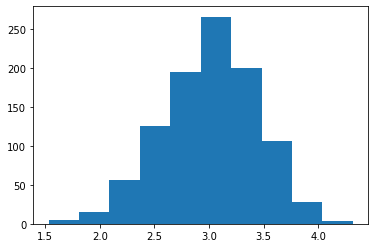

<IPython.core.display.Javascript object>

In [52]:
expected_experiences = []
for i in range(1000):
    expected_experience_dist = np.random.dirichlet(review_posterior)
    expected_experience = np.sum(expected_experience_dist * np.arange(1, 6))
    expected_experiences.append(expected_experience)
plt.hist(expected_experiences)

In [111]:
pred_product_ratings[chosen_product]

array([ 3.8042698,  2.1617506,  3.4376125, 10.6826725, 21.937807 ],
      dtype=float32)

<IPython.core.display.Javascript object>

(array([  3.,   4.,  27.,  82., 219., 424., 389., 169.,  66.,  17.]),
 array([3.77823147, 3.824517  , 3.87080254, 3.91708807, 3.9633736 ,
        4.00965914, 4.05594467, 4.1022302 , 4.14851573, 4.19480127,
        4.2410868 ]),
 <BarContainer object of 10 artists>)

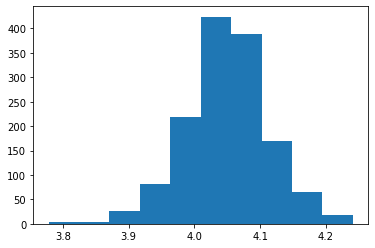

<IPython.core.display.Javascript object>

In [51]:
mean_ratings = np.sum(
    np.arange(1, 6)[None, :] * pred_product_ratings, axis=1
) / pred_product_ratings.sum(axis=1)
plt.hist(mean_ratings)

In [112]:
experience = simulator.get_actual_experience(
    expected_experience_dist, product_final_ratings=pred_product_ratings[chosen_product]
)

<IPython.core.display.Javascript object>

In [113]:
experience

5.0

<IPython.core.display.Javascript object>

In [61]:
actual_experience_dist = np.random.dirichlet(pred_product_ratings[chosen_product])
print(actual_experience_dist)
actual_experience = (
    np.where(np.random.multinomial(1, actual_experience_dist))[0][0] + 1.0
)
actual_experience

[0.11942709 0.07140238 0.10706023 0.15978916 0.54232114]


4.0

<IPython.core.display.Javascript object>

In [114]:
delta = simulator.mismatch_calculator(experience, expected_experience)
delta

2.4144198941425428

<IPython.core.display.Javascript object>

In [115]:
simulator.simulation_parameters["rho"][chosen_product]

array([1.04011502, 3.87123176])

<IPython.core.display.Javascript object>

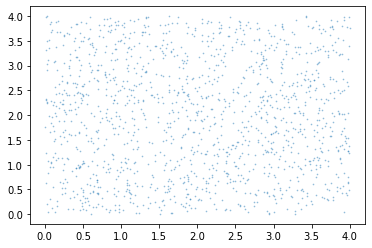

<IPython.core.display.Javascript object>

In [70]:
plt.scatter(
    simulator.simulation_parameters["rho"][:, 0],
    simulator.simulation_parameters["rho"][:, 1],
    alpha=0.4,
    s=0.5,
)

In [116]:
rating_index = simulator.rating_calculator(delta)
rating_index

4

<IPython.core.display.Javascript object>

In [117]:
decision_to_rate = simulator.decision_to_leave_review(delta, simulation_id)
decision_to_rate

True

<IPython.core.display.Javascript object>

In [77]:
delta

-1.122907064662865

<IPython.core.display.Javascript object>

# Count the number of products and reviews in the real marketplace

In [22]:
reviews = pyreadr.read_r(
    "/data/Dropbox/SNPE/all_data/reviews_bazaarvoice_main_vars.Rds"
)
reviews = reviews[None]
reviews.head()

,asin,overall,ReviewId,unixReviewTime,rootcategoryid
0,670155,4,3480905,2009-02-10,33005908
1,670155,3,3535864,2009-02-24,33005908
2,670155,5,3539112,2009-02-24,33005908
3,670155,4,3539514,2009-02-25,33005908
4,670155,1,3556157,2009-03-05,33005908


<IPython.core.display.Javascript object>

In [23]:
reviews.asin.unique().shape

(1406,)

<IPython.core.display.Javascript object>

In [24]:
reviews.shape

(135275, 5)

<IPython.core.display.Javascript object>

<AxesSubplot:>

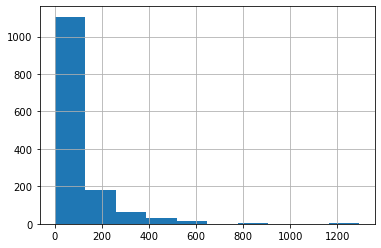

<IPython.core.display.Javascript object>

In [25]:
reviews.asin.value_counts().hist()

# Testing out all the code

In [11]:
simulator.load_embedding_density_estimators(None)

<IPython.core.display.Javascript object>

In [12]:
num_simulations = 100
simulator.simulation_parameters = simulator.generate_simulation_parameters(
    num_simulations * simulator.num_products
)

<IPython.core.display.Javascript object>

In [13]:
simulator.simulation_parameters["h_p"].shape

(2000,)

<IPython.core.display.Javascript object>

In [14]:
total_visitors = simulator.num_total_marketplace_reviews * 30
total_visitors

60000

<IPython.core.display.Javascript object>

In [12]:
simulated_reviews = [
    deque([np.ones(5)], maxlen=total_visitors) for prod in range(simulator.num_products)
]

<IPython.core.display.Javascript object>

In [13]:
len(simulated_reviews)

2000

<IPython.core.display.Javascript object>

In [14]:
product_embeddings = simulator.embedding_density_estimators[
    "products"
].multivariate_normal(np.zeros(100), np.diag(np.ones(100)), size=simulator.num_products)

<IPython.core.display.Javascript object>

In [15]:
product_embeddings.shape

(2000, 100)

<IPython.core.display.Javascript object>

In [16]:
visitor_embedding = simulator.embedding_density_estimators[
    "visitors"
].multivariate_normal(np.zeros(100), np.diag(np.ones(100)))

<IPython.core.display.Javascript object>

In [17]:
visitor_embedding.shape

(100,)

<IPython.core.display.Javascript object>

In [18]:
cos_sim = 1.0 - cdist(
    product_embeddings, visitor_embedding.reshape(1, -1), metric="cosine"
)
cos_sim.shape

(2000, 1)

<IPython.core.display.Javascript object>

(array([  6.,  35., 135., 366., 491., 485., 300., 139.,  36.,   7.]),
 array([-0.33563476, -0.26806207, -0.20048938, -0.1329167 , -0.06534401,
         0.00222867,  0.06980136,  0.13737405,  0.20494673,  0.27251942,
         0.34009211]),
 <BarContainer object of 10 artists>)

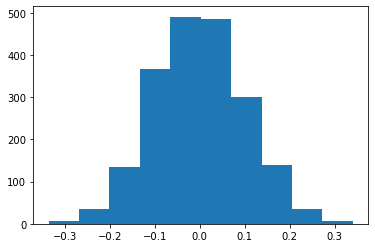

<IPython.core.display.Javascript object>

In [19]:
plt.hist(cos_sim)

In [21]:
consideration_set = np.argpartition(
    cos_sim.flatten(), -simulator.consideration_set_size
)[-simulator.consideration_set_size :]
consideration_set

array([1318,  496, 1450, 1221, 1383])

<IPython.core.display.Javascript object>

In [24]:
np.sort(cos_sim.flatten())[-5:]

array([0.29318424, 0.29486742, 0.3145481 , 0.3274308 , 0.34009211])

<IPython.core.display.Javascript object>

In [25]:
cos_sim = cos_sim.flatten()
cos_sim[consideration_set]

array([0.29318424, 0.29486742, 0.3145481 , 0.34009211, 0.3274308 ])

<IPython.core.display.Javascript object>

In [26]:
adj = np.random.random()
consideration_set_cos_sim = cos_sim[consideration_set]
consideration_set_cos_sim

array([0.29318424, 0.29486742, 0.3145481 , 0.34009211, 0.3274308 ])

<IPython.core.display.Javascript object>

In [27]:
consideration_set_reviews = np.array(
    [simulated_reviews[prod][-1] for prod in consideration_set]
)
consideration_set_reviews.shape

(5, 5)

<IPython.core.display.Javascript object>

In [28]:
consideration_set_reviews

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

<IPython.core.display.Javascript object>

In [29]:
consideration_set_avg_ratings = review_histogram_means(consideration_set_reviews)
consideration_set_avg_ratings

array([3., 3., 3., 3., 3.])

<IPython.core.display.Javascript object>

In [30]:
# Adjusting both cosine similarities and avg ratings to be on the same scale - 0 to 1
consideration_set_cos_sim = (consideration_set_cos_sim + 1.0) / 2.0
consideration_set_avg_ratings /= 5.0
print(consideration_set_cos_sim, consideration_set_avg_ratings)

[0.64659212 0.64743371 0.65727405 0.67004605 0.6637154 ] [0.6 0.6 0.6 0.6 0.6]


<IPython.core.display.Javascript object>

In [31]:
# Linear combination of cosine similarity and avg ratings using the adjuster
scores = (adj * consideration_set_cos_sim) + ((1 - adj) * consideration_set_avg_ratings)
scores

array([0.62198681, 0.62238395, 0.62702761, 0.63305471, 0.63006728])

<IPython.core.display.Javascript object>

In [33]:
# Calculate a shifted softmax to guard against over and underflow errors
# https://stackoverflow.com/questions/42599498/numercially-stable-softmax
exps = np.exp(scores - np.max(scores))
choice_p = exps / np.sum(exps)
print(choice_p)
# Finally pick a product according to these choice probabilities
choice_index = np.where(np.random.multinomial(1, choice_p))[0][0]
print(choice_index)

[0.19901712 0.19909618 0.20002286 0.20123206 0.20063179]
4


<IPython.core.display.Javascript object>

In [34]:
consideration_set[choice_index]

1383

<IPython.core.display.Javascript object>

In [38]:
chosen_product = simulator.multinomial_choice(
    consideration_set, cos_sim, simulated_reviews
)
chosen_product

496

<IPython.core.display.Javascript object>

In [39]:
chosen_product = simulator.simulate_visitor_choice(
    product_embeddings, simulated_reviews
)

<IPython.core.display.Javascript object>

In [40]:
chosen_product

625

<IPython.core.display.Javascript object>

In [41]:
simulation_id = (0 * simulator.num_products) + chosen_product
simulation_id

625

<IPython.core.display.Javascript object>

In [42]:
simulated_reviews[chosen_product][-1]

array([1., 1., 1., 1., 1.])

<IPython.core.display.Javascript object>

In [47]:
rating_index = simulator.simulate_visitor_journey(
    simulated_reviews[chosen_product][-1], simulation_id, False
)
rating_index

0

<IPython.core.display.Javascript object>

In [15]:
a = simulator.simulate_marketplace(1)

../snpe/simulations/marketplace_simulator_class.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([np.array(timeseries) for timeseries in simulated_reviews])


<IPython.core.display.Javascript object>

(array([6., 3., 1., 2., 0., 1., 2., 2., 1., 2.]),
 array([  8. ,  31.1,  54.2,  77.3, 100.4, 123.5, 146.6, 169.7, 192.8,
        215.9, 239. ]),
 <BarContainer object of 10 artists>)

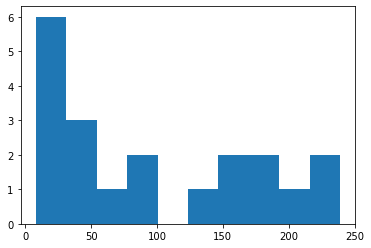

<IPython.core.display.Javascript object>

In [21]:
plt.hist([len(a[i]) for i in range(len(a))])

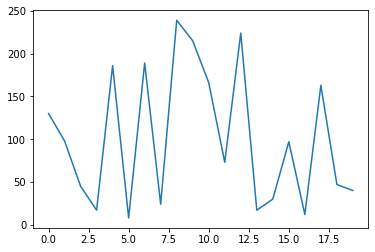

<IPython.core.display.Javascript object>

In [22]:
plt.plot([len(a[i]) for i in range(len(a))])

In [23]:
np.sum([len(a[i]) for i in range(len(a))])

2020

<IPython.core.display.Javascript object>